In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Ejercicio 1**

In [4]:
suma = 0.3 + 0.25
print(suma)

0.55


In [5]:
resta = 0.3 - 0.25
print(resta) #deberia devolver 0.05

0.04999999999999999


0.25 en binario = 0.01 = 0.1 x 2^(-1) \
0.03 en binario = 0.00000111101011100001...... \
Por lo que no se puede escribir 0.3 de forma exacta con una mantisa finita, el numero debe ser redondeado y de ahi el error de la resta.

**Ejercicio 2**

In [13]:
print(np.sqrt(2)**2-2)

4.440892098500626e-16


In [14]:
def func1(x: float):
    return func3(x) - 1
    
def func2(x: float):
    return (2*x*x)/(func3(x) + 1)

def func3(x: float):
    return np.sqrt(2*x*x + 1)

values = np.linspace(10**14, 10**16, 100) #crea el array con 100 puntos espaciados equivalentemente en el rango

def evaluarF(valores: np.array, funcion):
    return [funcion(x) for x in valores]

def graficarF(entrada: np.array, funcion):    
    salida = evaluarF(entrada, funcion)
    plt.plot(entrada, salida)

    

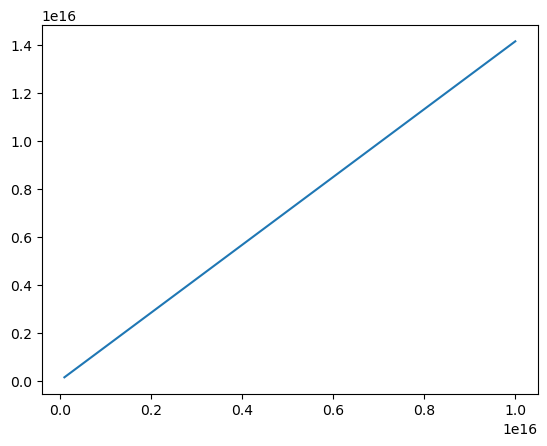

In [15]:
values = np.linspace(10**14, 10**16, 100) #crea el array con 100 puntos espaciados equivalentemente en el rango
graficarF(values, func1)


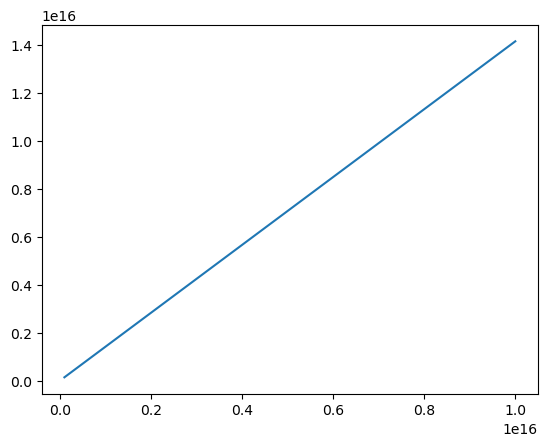

In [16]:
graficarF(values, func2)

**Ejercicio 3**

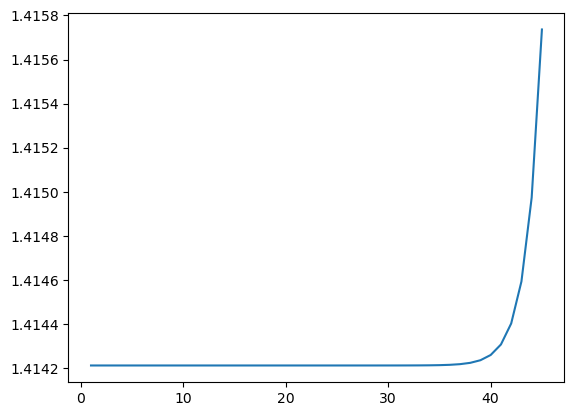

In [58]:
def sucesion1(x: int):
    if x == 1:
        return np.sqrt(2)
    else:
        return (sucesion1(x-1) ** 2)/np.sqrt(2)

values_sucesion = np.arange(1, 46)
graficarF(values_sucesion, sucesion1)

A partir de i=45 se desestabiliza notoriamente, tendiendo a infinito. Para i = 66 el valor es mayor a los floats representables

**Ejercicio 4**

In [11]:
def sumatoria1_32bits(n: int):
    sum = np.float32(0)
    for i in range(1, 10**n+1):
        sum += np.float32(1/i)
    return sum

def sumatoria1_64bits(n: int):
    sum = np.float64(0)
    for i in range(1, 10**n+1):
        sum += np.float64(1/i)
    return sum

def sumatoria2_32bits(n: int):
    sum = np.float32(0)
    for i in range(1, 5*10**n+1):
        sum += np.float32(1/i)
    return sum

def sumatoria2_64bits(n: int):
    sum = np.float64(0)
    for i in range(1, 5*10**n+1):
        sum += np.float64(1/i)
    return sum

In [13]:
sumatoria1_32bits(6)

np.float32(14.357358)

In [19]:
sumatoria1_64bits(6)

np.float64(14.392726722864989)

In [21]:
sumatoria1_32bits(7)

np.float32(15.403683)

In [22]:
sumatoria1_64bits(7)

np.float64(16.695311365857272)

In [23]:
sumatoria2_32bits(6)

np.float32(15.403683)

In [24]:
sumatoria2_64bits(6)

np.float64(16.002164235298594)

In [25]:
sumatoria2_32bits(7)

np.float32(15.403683)

In [26]:
sumatoria2_64bits(7)

np.float64(18.304749238293297)

**Ejercicio 5**

In [55]:
matriz = np.array([[4,2,1],[2,7,9],[0,5,22/3]])
L = np.array([[1,0,0],[0.5,1,0],[0,5/6,1]])
U = np.array([[4,2,1],[0,6,8.5],[0,0,0.25]])
matricesIguales(matriz, L@U)

True

**Ejercicio 6**

In [90]:
def esSimetrica(A: np.array):
    for i, row in enumerate(A):
        for j, value in enumerate(row):
            if A[j][i] != A[i][j]:
                return False
    return True

A = np.array(np.random.rand(4,4))
esSimetrica(A.T @ A)


True

In [91]:
esSimetrica(A.T @ (A * 0.25)/0.25)

True

In [92]:
esSimetrica(A.T @ (A * 0.2)/0.2)

False

**Modulo ALC**


In [12]:
def matricesIguales(A: np.array, B: np.array, atol = 1e-8):
    if A.size != B.size and A[0].size != B[0].size:
        return False
    for i, fila in enumerate(A):
        for j, valor in enumerate(fila):
           if error(np.float64(valor), np.float64(B[i][j])) > atol:
                return False
    return True

def error(x, y):
    return abs(np.float64(x) - np.float64(y))

def error_relativo(x,y):
    if x == 0:
        return abs(y)
    return error(x,y)/abs(x)


In [13]:
def sonIguales(x,y,atol=1e-08):
    return np.allclose(error(x,y),0,atol=atol)

assert(not sonIguales(1,1.1))
assert(sonIguales(1,1 + np.finfo('float64').eps))
assert(not sonIguales(1,1 + np.finfo('float32').eps))
assert(not sonIguales(np.float16(1),np.float16(1) + np.finfo('float32').eps))
assert(sonIguales(np.float16(1),np.float16(1) + np.finfo('float16').eps,atol=1e-3))

assert(np.allclose(error_relativo(1,1.1),0.1))
assert(np.allclose(error_relativo(2,1),0.5))
assert(np.allclose(error_relativo(-1,-1),0))
assert(np.allclose(error_relativo(1,-1),2))

assert(matricesIguales(np.diag([1,1]),np.eye(2)))
assert(matricesIguales(np.linalg.inv(np.array([[1,2],[3,4]]))@np.array([[1,2],[3,4]]),np.eye(2)))
assert(not matricesIguales(np.array([[1,2],[3,4]]).T,np.array([[1,2],[3,4]])))
